In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob
import os
import io

np.set_printoptions(linewidth=150)
np.set_printoptions(precision=3)

import os, sys
sys.path.append('../scripts/')
from podbox import read_vec_file, pod_modes

In [3]:
list_of_vec_files = glob('../../test/*.vec')
list_of_vec_files.sort()
list_of_vec_files

['../../test/06302014_2Hz_particles000200.T000.D000.P000.H000.L.vec',
 '../../test/06302014_2Hz_particles000201.T000.D000.P000.H000.L.vec',
 '../../test/06302014_2Hz_particles000202.T000.D000.P000.H000.L.vec',
 '../../test/06302014_2Hz_particles000203.T000.D000.P000.H000.L.vec',
 '../../test/06302014_2Hz_particles000204.T000.D000.P000.H000.L.vec',
 '../../test/06302014_2Hz_particles000205.T000.D000.P000.H000.L.vec',
 '../../test/06302014_2Hz_particles000206.T000.D000.P000.H000.L.vec',
 '../../test/06302014_2Hz_particles000207.T000.D000.P000.H000.L.vec',
 '../../test/06302014_2Hz_particles000208.T000.D000.P000.H000.L.vec',
 '../../test/06302014_2Hz_particles000209.T000.D000.P000.H000.L.vec',
 '../../test/06302014_2Hz_particles000210.T000.D000.P000.H000.L.vec']

In [4]:
u,v,chc = [],[],[]
for fname in list_of_vec_files:
    x,y,_u,_v,_chc = read_vec_file(fname)
    u.append(_u)
    v.append(_v)
    chc.append(_chc)

u = np.stack(u)
v = np.stack(v)
chc = np.stack(chc)

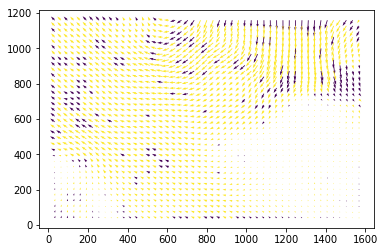

In [5]:
fig,ax = plt.subplots()
ax.quiver(x,y,u[0,:,:],v[0,:,:],chc[0,:,:])

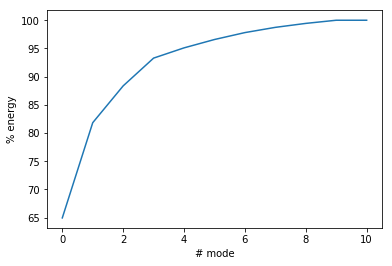

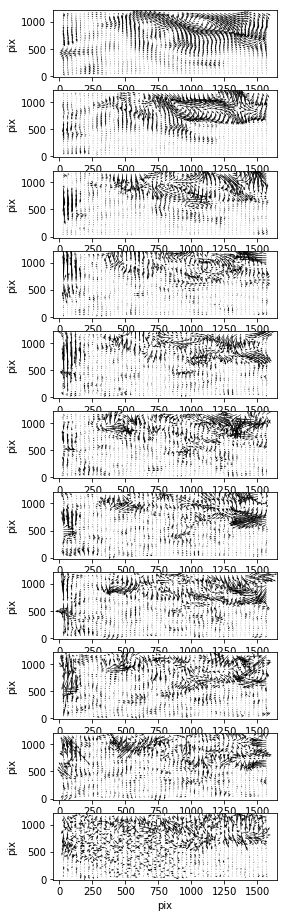

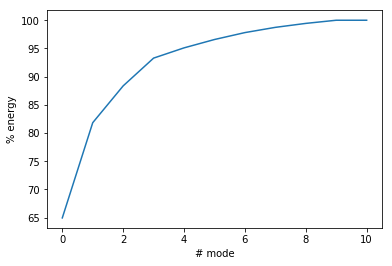

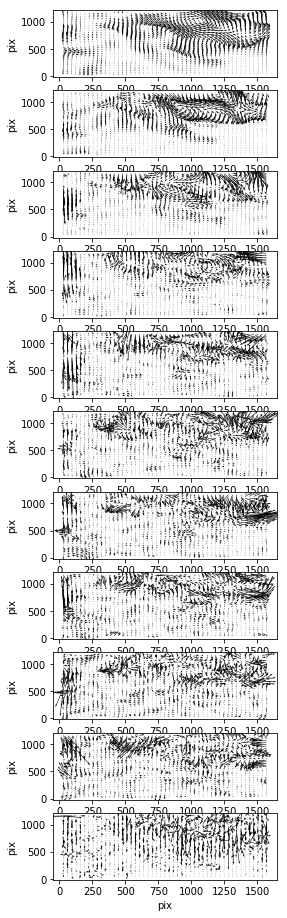

In [6]:
N = len(u)
for method in ['snapshot','direct']:
    umodes,vmodes,Erel = pod_modes(u,v,n_modes=None, method=method)

    plt.figure()
    plt.plot(Erel[:N]*100)
    plt.ylabel('% energy')
    plt.xlabel('# mode')

    fig,ax = plt.subplots(N,1,figsize=(4,16))
    for i in range(N):
        ax[i].quiver(x,y,umodes[:,:,i],vmodes[:,:,i])
        ax[i].set_xlabel('pix')
        ax[i].set_ylabel('pix')

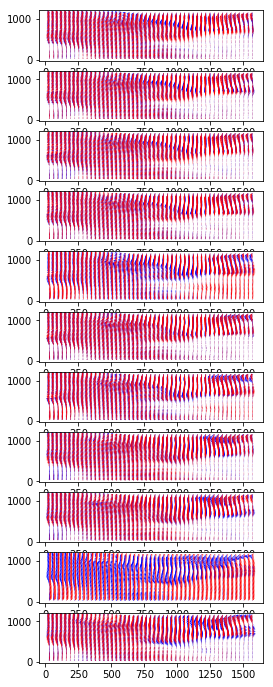

In [7]:
# multi-mode reconstruction
umodes,vmodes,Erel,ur,vr = pod_modes(u,v,n_modes=None, method='snapshot',\
                                      reconstruction='flow',modes_list=[0,1])
fig,ax = plt.subplots(N,1,figsize=(4,12))
for i in range(N):
    ax[i].quiver(x,y,u[i,:,:],v[i,:,:],color='b')
    ax[i].quiver(x,y,ur[i,:,:],vr[i,:,:],color='r')

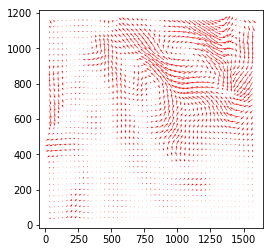

In [8]:
# multi-mode reconstruction
umodes,vmodes,Erel,ur,vr = pod_modes(u,v,n_modes=None, method='snapshot',\
                                      reconstruction='weight',modes_list=[0,1,2])
fig,ax = plt.subplots(figsize=(4,4))
ax.quiver(x,y,ur,vr,color='r')

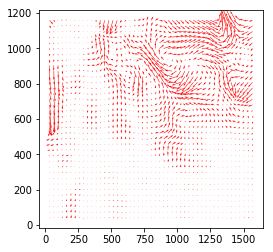

In [9]:
# multi-mode reconstruction
umodes,vmodes,Erel,ur,vr = pod_modes(u,v,n_modes=None, method='snapshot',\
                                      reconstruction='no_weight',modes_list=[0,1,2])
fig,ax = plt.subplots(figsize=(4,4))
ax.quiver(x,y,ur,vr,color='r')